# FEATURE SELECTION
Feature selection is a process where you automatically or manually select those features which have the maximum contribution to your model prediction output. Having irrelevant features can lead to a decrease in accuracy as your model learns from insignificant features.

This assignment will focus on manual selection of relevant features.
The dataset is of different camera models with different featues and their price. 

The assignment has both marked questions and unmarked ones. 
All questions written beside QUESTION # are evaluated for your final score and the ones that are not have been given only to improve your understanding.

## 1. Importing Important Packages

In [36]:
# ALL NECESSARY PACKAGES HAVE BEEN IMPORTED FOR YOU
# DO NOT MAKE ANY CHANGES IN THIS CODE CELL!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from pandas.plotting import scatter_matrix
import json
ans = [None]*8

In [37]:
import warnings
warnings.filterwarnings("ignore")

## 2. Importing the Dataset


In [38]:
# THE DATASET HAS BEEN IMPORTED AND STORED IN THE VARIABLE DATASET
# A SMALL SET OF THE DATA HAS BEEN SHOWN WHICH WILL GIVE A BRIEF UNDERSTANDING OF THE DATASET
# THE DESCRIPTION OF THE DATA HAS ALSO BEEN PRINTED
# DO NOT MAKE CHANGES IN THE CELL!

dataset = pd.read_csv("camera_dataset.csv")
dataset.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [39]:
# OBSERVE THE STATISTICS OF THE DIFFERENT FEATURES OF THE DATASET
# DO NOT CHANGE THIS CELL

print("Statistics of the Dataset: \n")
dataset.describe()

Statistics of the Dataset: 



,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [40]:
dataset.shape

(1038, 13)

In [41]:
# Find the total number of NaN values present in the dataset.
# HINT: You can use "df.isna()" function (where df is your dataframe) from pandas to find NaN values.

# START YOUR CODE HERE:
print("Count, no. of rows with NaN values (column wise)")
dataset.isnull().sum()



# END YOUR CODE HERE

Count, no. of rows with NaN values (column wise)


Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

In [42]:
# THE NaN VALUES HAVE BEEN CLEANED BY REMOVING THE CORRESPONDING DATA POINTS. 
# THE CLEANED DATASET IS STORED IN THE VARIABLE "data". USE IT FOR FURTHER USE

# DO NOT CHANGE THIS CELL!

def remove_nan(df):
  df_copy = df.copy()
  df_copy.dropna(inplace = True)
  return df_copy

data = remove_nan(dataset)

## 3. UNDERSTANDING THE DATA

In [43]:
# Find the number of data points i.e rows in the cleaned dataset i.e data variable. You can already see in an above cell how many features i.e columns there are.

# wRITE YOUR CODE HERE

print("Cleaned dataset shape: ", data.shape)


# END YOUR CODE HERE

Cleaned dataset shape:  (1036, 13)


In [44]:
# QUESTION 1: Find the datatype of the values stored in the "Model" column of the dataset and write them inside inverted commas. () (1 marks)
# QUESTION 2: Find the datatype of the values stored in the "Dimensions" column of the dataset and write them inside inverted commas. (1 marks)
#                Assign the answer of Question 1 to ans[0],
#                Assign the answer of Question 2 to ans[1]. 
#                eg:- ans[0] = "int64"/"float64" if the ans is int64/float64
# NOTE: Do not write "int". Write "int64".

In [71]:
# START YOUR CODE HERE:
print("Data type of the column Model: ", str(data['Model'].dtypes))
print("Data type of the column Dimensions: ", str(data['Dimensions'].dtypes))


# END CODE HERE

Data type of the column Model:  object
Data type of the column Dimensions:  float64


In [72]:
# WRITE YOUR ANSWERS HERE BY SUBSTITUTING None WITH YOUR ANSWER:
# DO NOT CHANGE THE INDEXES! OTHERWISE THE ANSWER MIGHT BE EVALUATED WRONG!

ans[0] = str(data['Model'].dtypes)
ans[1] = str(data['Dimensions'].dtypes)

In [47]:
# QUESTION 3: Find out the number of unique release dates present in the dataset under the "Release date" column. (1 mark)
#             Assign the answer to ans[2].


In [48]:
# START YOUR CODE HERE

data["Release date"].unique()



# END YOUR CODE HERE

array([1997, 1998, 2000, 1999, 2001, 1996, 2002, 2003, 2004, 2005, 2006,
       2007, 1994, 1995], dtype=int64)

In [49]:
# WRITE YOUR ANSWER HERE BY SUBSTITUTING None WITH YOUR ANSWER

ans[2] = len(data["Release date"].unique())  

In [50]:
# If you run the same for the "Model" column you will observe that the 
# model column is unique and cannot be treated as a feature for predicting the price.
# Hence we will not bother about that column from now.
print("Length of the dataset: ", len(data), "\nLength of the unique values of column Model: ", len(data["Model"].unique()))

Length of the dataset:  1036 
Length of the unique values of column Model:  1036


## 4. VISUALIZING THE DATA

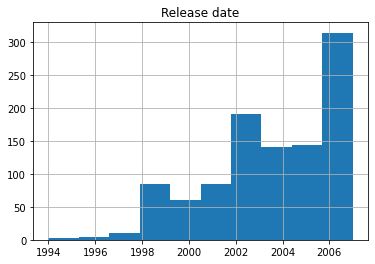

In [51]:
# RUN THE CELL BELOW TO OBSERVE THE HISTOGRAM OF THE "Release date" COLUMN
# DO NOT CHANGE THIS CELL!
data.hist(column = "Release date");

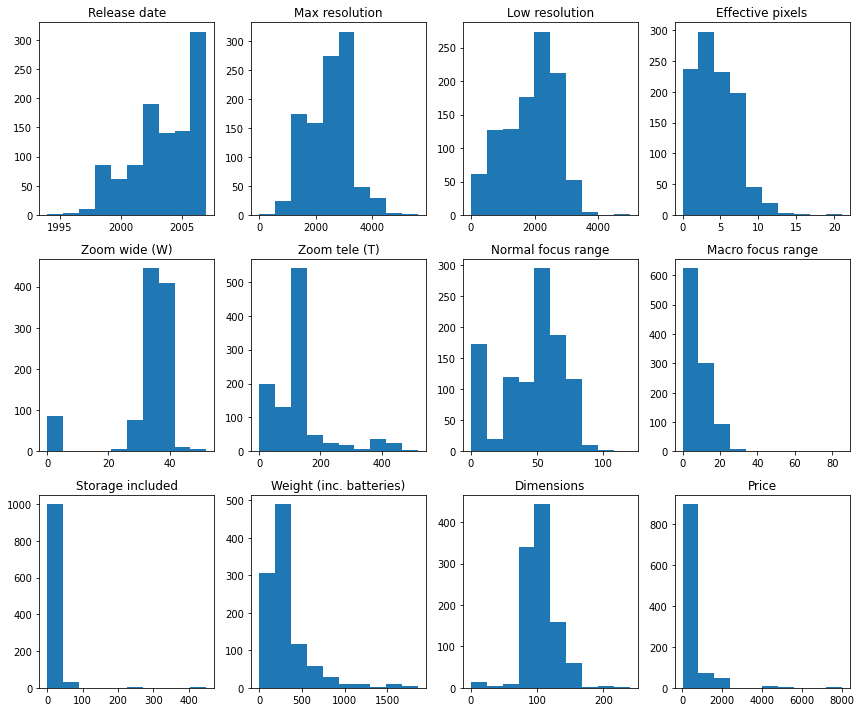

In [52]:
# TRY PLOTTING THE HISTOGRAM FOR THE OTHER COLUMNS

# HINT 1: You can use a for loop to plot the histogram for all the columns in one go.
# HINT 2: The code, "dataset.columns" gives a list of the columns of the dataset. 
# HINT 3: The "not in" phrase can be used to find if an element is not present in a particular list.

# START CODE HERE:
cols = data.columns[1:]
fig, ax = plt.subplots(3, 4, figsize = (12, 10), tight_layout = True)
for i in range(len(ax)):
    for j in range(len(ax[0])):
        ax[i][j].hist(data[cols[i*len(ax[0])+j]])
        ax[i][j].set_title(cols[i*len(ax[0])+j])


# END CODE HERE

## 5. CORRELATION OF DATA

In [53]:
# QUESTION 4: Find the column which has the highest negative correlation with the "Price" column. Write the column name 
#             and the aboslute value of the correlation (1 + 1 = 2 marks)
#             eg: if correlation of A with B is -0.66 and correlation of A with C is -0.89 then the answer would be C and 0.89.
#             Assign the column name to ans[3] and remember to put your answer inside inverted commas.
#             Assign the correlation value to ans[4] and remember to write the absolute value i.e |x|.
#             eg: ans[3] = "Model" if the answer is the Model column
#             eg: ans[4] = 0.74 if the correlation value is -0.74. 

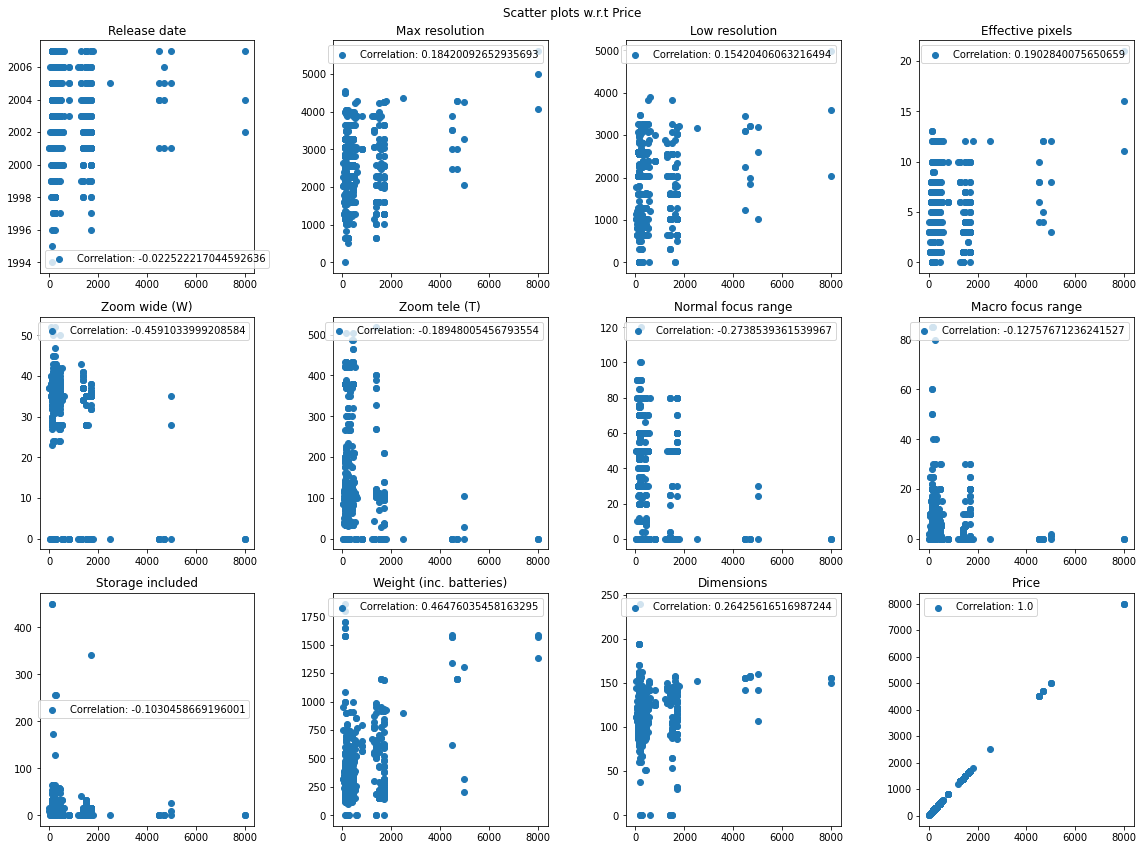

In [54]:
# START YOUR CODE HERE:
cols = data.columns[1:]
fig, ax = plt.subplots(3, 4, figsize = (16, 12), tight_layout = True)
for i in range(len(ax)):
    for j in range(len(ax[0])):
        k = i*len(ax[0])+j
        if(k >= len(cols)): break
        ax[i][j].scatter(data["Price"], data[cols[k]], label="Correlation: "+str(pearsonr(data["Price"], data[cols[k]])[0]))
        ax[i][j].set_title(cols[k])
        ax[i][j].legend(loc="best")
fig.suptitle("Scatter plots w.r.t Price");


# END CODE HERE

In [75]:
highest_corr = 1.0
cols = data.columns[1:-1]
for col in cols:
    correlation = data[col].corr(data["Price"])

    if(correlation<highest_corr):
        highest_corr = correlation
        highest_corr_col = col

print("Column name: ", highest_corr_col)   
print("Highest correlation: ", abs(highest_corr))

Column name:  Zoom wide (W)
Highest correlation:  0.4591033999208591


In [76]:
ans[3] = highest_corr_col
ans[4] = abs(highest_corr)

## 5. DISTINCTIVE FEATURES

In [56]:
# QUESTION 5: Find the number of data points whose (a) price > 50 percentile mark AND (b) Release date > 50 percentile mark. (2 mark)
#             NOTE: There are two conditions in the question above, both of which needs to be satisfied.
#             Assign the answer to ans[5].

In [57]:
data.describe()[["Price", "Release date"]]

,Price,Release date
count,1036.000000,1036.000000
mean,457.921815,2003.584942
std,761.088735,2.724291
min,14.000000,1994.000000
25%,149.000000,2002.000000
50%,199.000000,2004.000000
75%,399.000000,2006.000000
max,7999.000000,2007.000000


In [58]:
# START YOUR CODE:

temp = data[["Price", "Release date"]].quantile(.5)
df = data.loc[data["Release date"]>temp["Release date"]][data["Price"]>temp["Price"]]
df.describe()[["Price", "Release date"]]

# END YOUR CODE

,Price,Release date
count,220.000000,220.000000
mean,709.350000,2006.068182
std,968.577293,0.822007
min,229.000000,2005.000000
25%,249.000000,2005.000000
50%,399.000000,2006.000000
75%,509.000000,2007.000000
max,7999.000000,2007.000000


In [59]:
ans[5] = len(df)

In [60]:
# Also try finding the no data points whose (a) price > 50 percentile mark AND (b) Release Date < 59 percentile mark. 

# Can you justify why "Release date >/< 50 percentile mark" is not a good distinctive feature?

# Repeat the above steps with "Release data >/< (a) 25 percentile mark (b) 75 percentile mark (c)mean.

# Can you justify why "Release date" is not a good distinctive feature at all?

In [77]:
# Price > 50%ile Release Date > 50%ile
price_50 = data['Price'].quantile(0.5)
release_date_50 = data['Release date'].quantile(0.5)
data_distinctive_1 = data[(data['Price']>price_50) & (data['Release date']>release_date_50)]
print("# Price > 50%ile Release Date > 50%ile : ",len(data_distinctive_1))

# Price > 50%ile Release Date < 50%ile
price_50 = data['Price'].quantile(0.5)
release_date_50 = data['Release date'].quantile(0.5)
data_distinctive_2 = data[(data['Price']>price_50) & (data['Release date']<release_date_50)]
print("# Price > 50%ile Release Date < 50%ile : ",len(data_distinctive_2))

# Price > 50%ile Release Date > 25%ile
price_50 = data['Price'].quantile(0.5)
release_date_25 = data['Release date'].quantile(0.25)
data_distinctive_3 = data[(data['Price']>price_50) & (data['Release date']>release_date_25)]
print("# Price > 50%ile Release Date > 25%ile : ",len(data_distinctive_3))

# Price > 50%ile Release Date < 25%ile
price_50 = data['Price'].quantile(0.5)
release_date_25 = data['Release date'].quantile(0.25)
data_distinctive_4 = data[(data['Price']>price_50) & (data['Release date']<release_date_25)]
print("# Price > 50%ile Release Date < 25%ile : ",len(data_distinctive_4))

# Price > 50%ile Release Date > 75%ile
price_50 = data['Price'].quantile(0.5)
release_date_75 = data['Release date'].quantile(0.75)
data_distinctive_5 = data[(data['Price']>price_50) & (data['Release date']>release_date_75)]
print("# Price > 50%ile Release Date > 75%ile : ",len(data_distinctive_5))

# Price > 50%ile Release Date < 75%ile
price_50 = data['Price'].quantile(0.5)
release_date_75 = data['Release date'].quantile(0.75)
data_distinctive_6 = data[(data['Price']>price_50) & (data['Release date']<release_date_75)]
print("# Price > 50%ile Release Date < 75%ile : ",len(data_distinctive_6))

# Price > 50%ile Release Date > mean
price_50 = data['Price'].quantile(0.5)
release_date_mean = data['Release date'].mean()
data_distinctive_7 = data[(data['Price']>price_50) & (data['Release date']>release_date_mean)]
print("# Price > 50%ile Release Date > mean : ",len(data_distinctive_7))

# Price > 50%ile Release Date < mean
price_50 = data['Price'].quantile(0.5)
release_date_mean = data['Release date'].mean()
data_distinctive_8 = data[(data['Price']>price_50) & (data['Release date']<release_date_mean)]
print("# Price > 50%ile Release Date < mean : ",len(data_distinctive_8))

# Price > 50%ile Release Date > 50%ile :  220
# Price > 50%ile Release Date < 50%ile :  212
# Price > 50%ile Release Date > 25%ile :  348
# Price > 50%ile Release Date < 25%ile :  112
# Price > 50%ile Release Date > 75%ile :  82
# Price > 50%ile Release Date < 75%ile :  357
# Price > 50%ile Release Date > mean :  298
# Price > 50%ile Release Date < mean :  212


#### We can see that Release date >/< 50 percentile mark is not a good distinctive feature and in general Release Date is not a good distinctive feature at all

In [61]:
# QUESTION 6: Find the number of data points whose (a) price > 50 percentile mark AND (b) Weight (inc. batteries) > 75th percentile mark.(2 mark)
#             NOTE: BOTH the conditions stated above need to be satisfied.
#             Assign the answer to ans[6].

In [62]:
data.describe()[["Price", "Weight (inc. batteries)"]]

,Price,Weight (inc. batteries)
count,1036.000000,1036.000000
mean,457.921815,319.265444
std,761.088735,260.410137
min,14.000000,0.000000
25%,149.000000,180.000000
50%,199.000000,226.000000
75%,399.000000,350.000000
max,7999.000000,1860.000000


In [63]:
# START YOUR CODE HERE:
temp = data[["Price", "Weight (inc. batteries)"]].quantile([.5, .75])
df = data.loc[data["Price"]>temp["Price"][0.5]][data["Weight (inc. batteries)"]>temp["Weight (inc. batteries)"][0.75]]
df[["Price", "Weight (inc. batteries)"]].describe()

# END YOUR CODE HERE

,Price,Weight (inc. batteries)
count,165.000000,165.000000
mean,1250.181818,663.369697
std,1404.983279,284.258904
min,229.000000,360.000000
25%,399.000000,467.000000
50%,799.000000,590.000000
75%,1599.000000,770.000000
max,7999.000000,1585.000000


In [64]:
# WRITE YOUR ANSWER HERE BY SUBSTITUTING None WITH YOUR ANSWER

ans[6] = len(df)       

In [65]:
# Try the same with (a) price > 50 percentile mark AND (b) Weight (inc. batteries) < 75 percentile mark.
# Can you justify whether Weight (inc. batteries) >/< 75 percentile mark is a good distinctive feature?
# HINT: Weight (inc. batteries) > 75 percentile mark implies that price will be ?

In [66]:
print("Number of items with Weight (inc. batteries) > 75% mark: ", len(data[data["Weight (inc. batteries)"]>temp["Weight (inc. batteries)"][0.75]]))
print("Total number of items", len(data))
print("since the division of items with above distinctive feature is not equipartition, so it's not a good distinctive feature")

Number of items with Weight (inc. batteries) > 75% mark:  253
Total number of items 1036
since the division of items with above distinctive feature is not equipartition, so it's not a good distinctive feature


In [67]:
# TRY FITTING TWO LINEAR REGRESSION MODELS BY ONCE DROPPING THE FEATURE "Weight (inc. batteries)"
# AND ONCE BY KEEPING ALL FEATURES. THEN COMPARE THE TRAINING/VALIDATION ACCURACY OF THE TWO
# NOTE: A LINEAR REGRESSION MODEL HAS BEEN IMPLEMENTED FOR YOU IN THE CELL BELOW 

In [68]:
# PRE IMPLEMENTED LINEAR REGRESSOR
# CHANGE THIS CELL ONLY WHERE INDICATED!

def implement_linear_reg():
  # data_fs : Dataset from which you drop your most distinctive feature
  # data :  The original Dataset with all features intact (except "Model" which we dropped earlier)
  # X : the training features
  # Y : the training label (the "Price" column)
  # xtrain, xval : the training set and validation set respectively
  # linreg : The linear regression model
  
  linreg = LinearRegression(fit_intercept = True, normalize = False)

  data_fs = data.copy()              #Use data_fs as the dataset from where you drop the most distinctive feature. 

  # START YOUR CODE HERE:
  
  # You can write the column name enclosed within inverted commas inside the empty [] i.e eg: data_fs.drop(columns = ["Model"], inplace = True)
  data_fs.drop(columns = ["Model", "Weight (inc. batteries)"], inplace = True)

  # END YOUR CODE HERE
  
  Y = data["Price"]
  X = data.drop(columns = ["Model", "Price"])
  xtrain, xval, ytrain, yval = train_test_split(X, Y, test_size = 100, random_state = 40)
  
  linreg.fit(xtrain, ytrain)
  

  print("\n Train Accuracy of Linear Regression model with distinctive feature = ", linreg.score(xtrain, ytrain))
  print("\n Validation Accuracy of Linear Regression model with distinctive feature = ", linreg.score(xval, yval))
  
  Y = data_fs["Price"]
  X = data_fs.drop(columns = ["Price"])
  xtrain, xval, ytrain, yval = train_test_split(X, Y, test_size = 100, random_state = 40)

  linreg.fit(xtrain, ytrain)
  print("\n Train Accuracy of Linear Regression model without distinctive feature = ", linreg.score(xtrain, ytrain))
  print("\n Validation Accuracy of Linear Regression model without distinctive feature = ", linreg.score(xval, yval))


implement_linear_reg()


 Train Accuracy of Linear Regression model with distinctive feature =  0.30824841336860254

 Validation Accuracy of Linear Regression model with distinctive feature =  0.17324036084797023

 Train Accuracy of Linear Regression model without distinctive feature =  0.26015598532272965

 Validation Accuracy of Linear Regression model without distinctive feature =  0.08807588276988398


In [69]:
# RUN THE CODE BELOW TO GET YOUR ANSWERS EVALUATED.
# DO NOT CHANGE THIS CELL!

ans = [item for item in ans]
with open("ans1.json", "w") as f:
  json.dump(ans, f)


In [70]:
! ../submit ans.json

'..' is not recognized as an internal or external command,
operable program or batch file.
